# Pandagare, Shirish - Homework 1

### Submission
Replace Last Name, First Name above with your name. When you complete this homework, please click "File" -> "Print Preview". Print the resulting browser tab (double check that all code / markdown is there and that plots are visible). Submit a physical copy of your homework **in class on Wednesday 30th January**.

### R versus Python
You may complete this homework in either R or python. The current notebook is written in R. If you are completing your homework in R, you can simply modify this notebook with your answers. If you are completing your homework in python, initiate a Jupyter python notebook and write your answers there.

### Background Reading for Problems
- Section 20.1 - 20.5 in "Numerical Analysis" by Lange.

## Question 1: Inverse Method for geometric random variates

1. Using the inverse method and the language $Unif[0,1]$ generator (runif in R, numpy.random.uniform in python), write a function to generate random variates from a geometric distribution with probability of success $p$. Both $p$ and the number of random variates should be arguments to your function.
2. For some particular $p$ of your choosing, make a plot of the proportion of random variates taking each value and plot the true geometric probability mass function on top to confirm that the generator is working.
3. Compare the speed of your geometric generator to the language generator (rgeom in R, numpy.random.geometric in python). Try to make your generator computationally competitive with the built in generator by avoiding for loops and other slow code.
4. How do you think your method would compare to an approach that generates a sequence of random trials with probability $p$ of success until the first success and then records the number of failures until the first success? Why?


In [39]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

# Code for Question 1

In [217]:
class question_1():
    ## Answer 1.1
    ##Function to generate random variate from a geometric distribution. p and n are two arguments required for the 
    ## the function, where p is the probabilty of success and n is number of random variate to be generated. 
    def geo_inverse(p,n):
        import numpy as np
        import math
        U = np.random.uniform(size = n)      # n number of Uniform Random number generated between 0-1.
        var = np.zeros(n)
        for i in range(n):
            N = math.ceil(np.log(U[i])/np.log(1-p))   ## Inverse random number generated
            var[i] = N
            
        return var
#********************************************************************************************************************    
    ## Answer 1.2
    ## This function generate the histogram graph for the geometric distribution from the "geo_inverse" function
    ## and to compare it with the true distribution, step plot is drawn over the previous graph. No further arguments
    ## are required in the function
    def graph(p):
        import matplotlib.pyplot as plt
        from matplotlib.pyplot import figure
        figure(num=None, figsize=(8, 6), dpi=500, facecolor='w', edgecolor='k')
        x = question_1.geo_inverse(p, 1000000)
        y = np.random.geometric(p, 1000000)
        num = np.arange(1,101)
        plt.hist(x, color= "y", bins= 100, density=True);
        plt.hist(y, color= "r", histtype='step', bins=100, density=True);
        plt.xlim([0,30]);
        plt.xlabel("Number of trails until first success", fontsize= 15);
        plt.ylabel("Proportion of Random Variates", fontsize= 15);
        plt.title("Geometric Distribution Graph", fontsize= 15)
        plt.show()
        
        
#******************************************************************************************************************

    ## Answer 1.3
    def np_Geo_dist(p,n):
        np.random.geometric(p,n)
#******************************************************************************************************************


    def bernoulli(p):
        from scipy.stats import bernoulli
        count = 0 
        while bernoulli.rvs(p, size=1) == 0:
            count +=1
        return count 

# Answer 1.1

In [74]:
question_1.geo_inverse(0.2,100)

array([14.,  4.,  3., 10.,  2., 12.,  2.,  3., 10.,  1.,  2.,  1.,  1.,
        3.,  1.,  3.,  3., 11.,  5.,  4., 13.,  8.,  8.,  1.,  8.,  1.,
        8.,  8.,  3.,  6.,  1.,  3.,  4.,  2.,  4.,  1., 13.,  2.,  2.,
       12., 15.,  4.,  1.,  7.,  1., 13.,  3., 14.,  1.,  2.,  5.,  4.,
        3.,  5.,  4.,  2., 14.,  1.,  2.,  2.,  2.,  3.,  6.,  5.,  6.,
        5.,  6.,  3.,  1.,  7., 10.,  5.,  3.,  2.,  1.,  1.,  3.,  3.,
        2., 10.,  1.,  7., 10., 24.,  5.,  2.,  2.,  4., 11.,  5., 10.,
        2.,  3.,  3., 10.,  7.,  1.,  6.,  2.,  6.])

# Answer 1.2

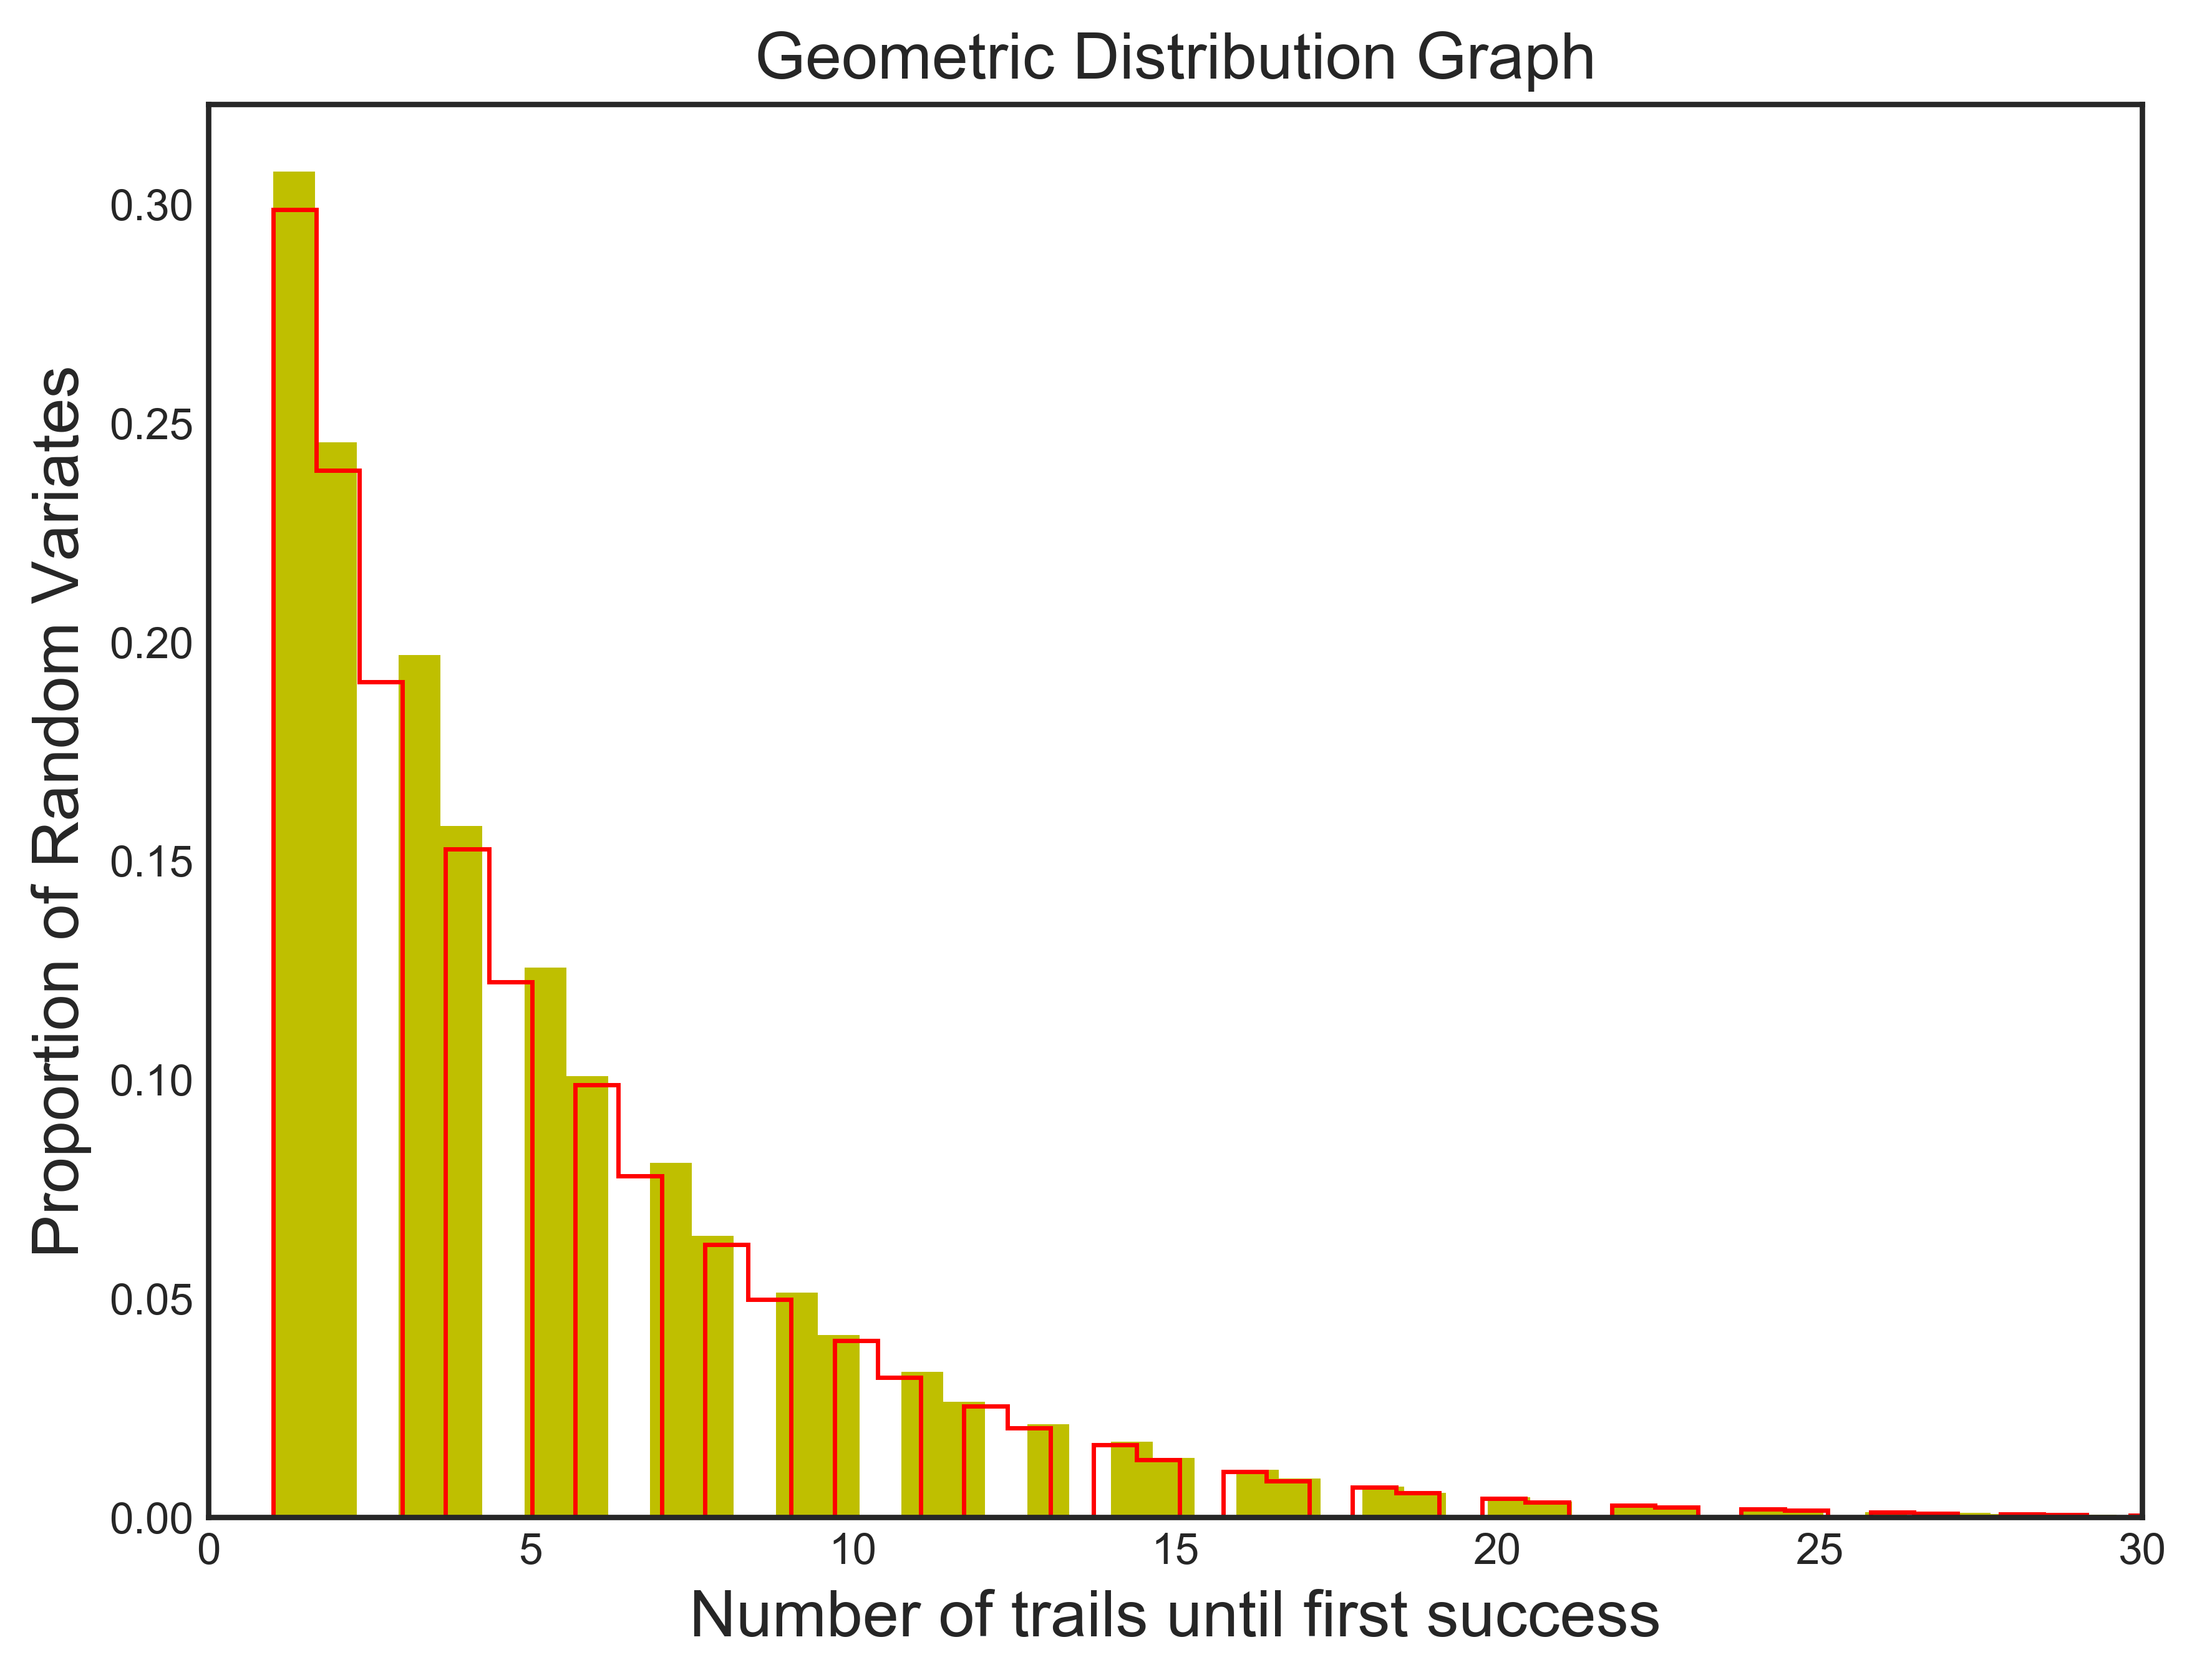

In [218]:
question_1.graph(0.2)

# Answer 1.3

In [80]:
%%timeit
## Answer 1.3
question_1.geo_inverse(0.2,10)

25.7 µs ± 470 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [81]:
%%timeit
## Answer 1.3
question_1.np_Geo_dist(0.2,10)

1.67 µs ± 71.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Time required to run the function is 25.7 $\mu s$. This is the best time that I got after number of modifications. 

# Answer 1.4

In [222]:
%%timeit
question_1.bernoulli(0.2)

246 µs ± 26.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


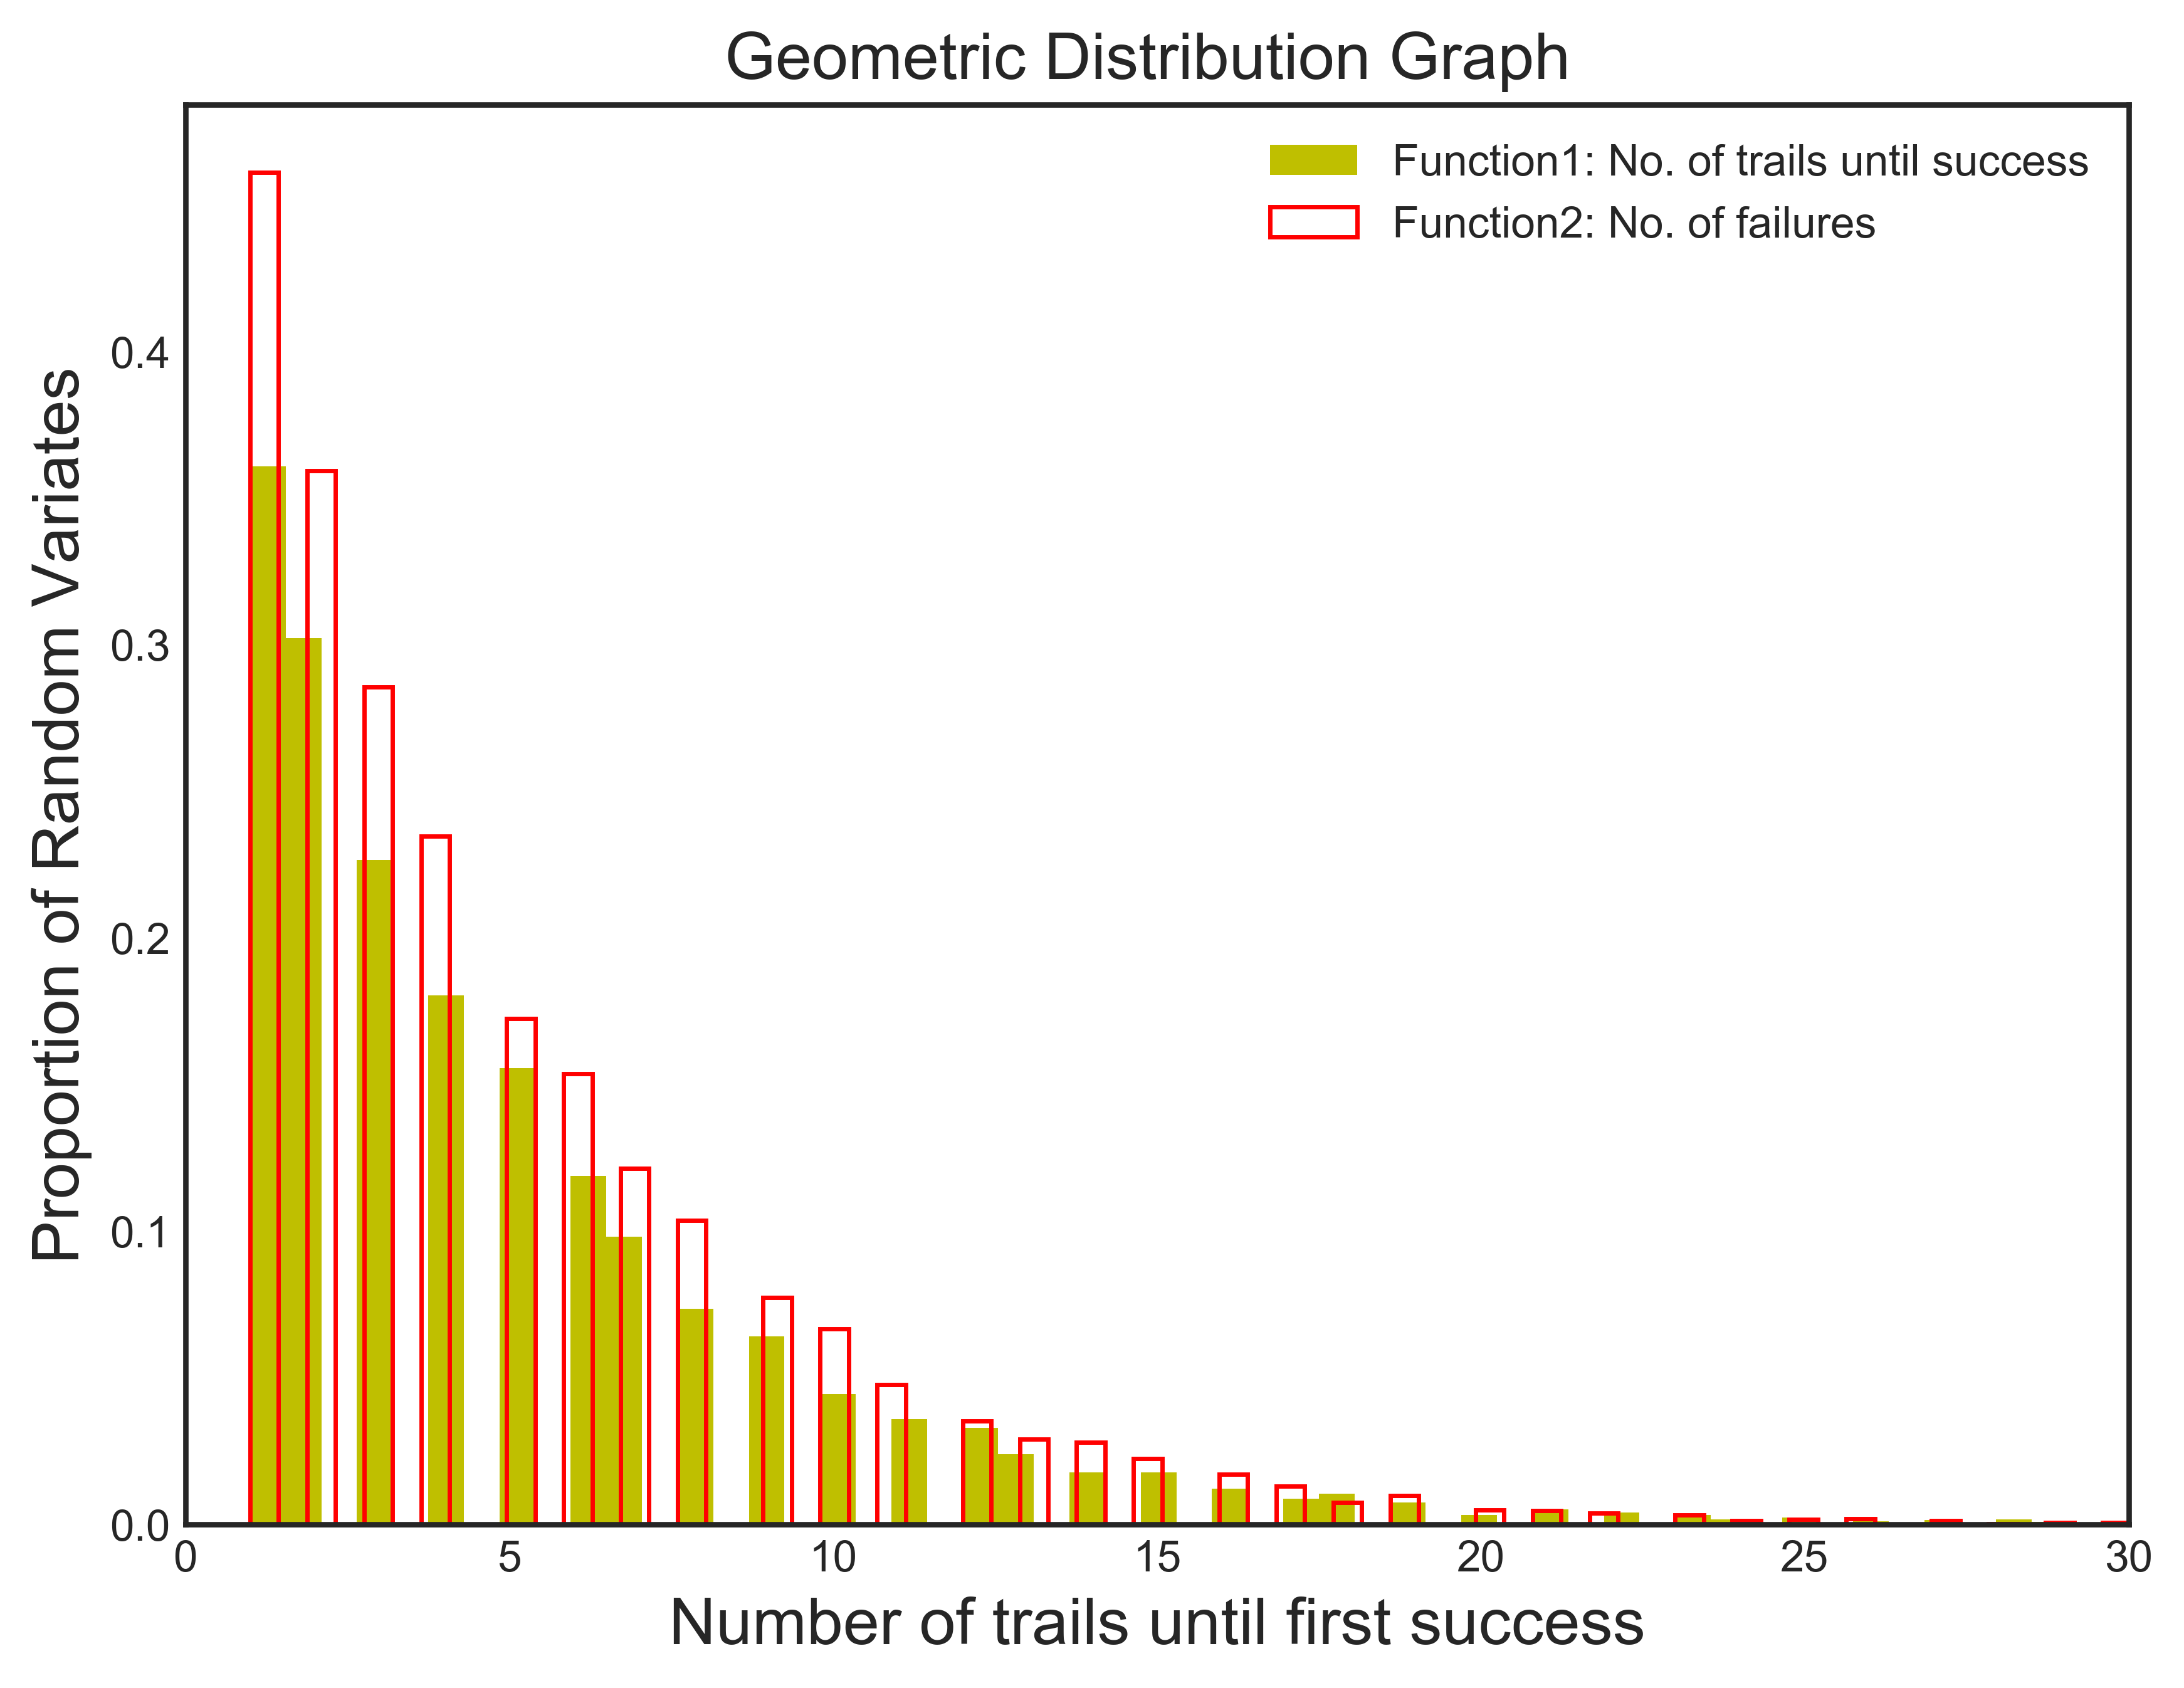

In [232]:
### Comparing function of part 1 and part 4 by plotting a histogram. 

trail = []
for i in range(10000):
    trail.append(question_1.bernoulli(0.2)+1)          ### +1 as it is computing number of success
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=500, facecolor='w', edgecolor='k')
x = answer_1.geo_inverse(0.2, 10000)
y_1 = trail
plt.hist(x, color= "y", bins= 100, density=True, label= "Function1: No. of trails until success");
plt.hist(y_1, color= "r", histtype='step', bins=100, density=True, label= "Function2: No. of failures");
plt.xlim([0,30]);
plt.xlabel("Number of trails until first success", fontsize=15);
plt.ylabel("Proportion of Random Variates", fontsize=15);
plt.title("Geometric Distribution Graph ", fontsize=15)
plt.legend()
plt.show()

It looking at the graph, it is close enough to the function generated in part 1. However, running time for this function is 246 $\mu s$, which is almost 10 times large than the function in part 1. 

## Question 2: Simulation Study of the LLN and CLT

1. Create an $n \times m$ matrix $X$ with $n=100$ and $m=1000$ and each entry $X_{ij} \sim \text{Exp}(\lambda)$ (rexp in R, numpy.random.exponential in python). Set the rate parameter to be $\lambda=0.5$ so that the mean of $X_{ij}$ is $2$ (beware that there are multiple ways of parameterizing the exponential distribution and python does it differently to R). <br>If you would like some intuition for this simulation consider the following situation: we survey $100$ bus stops in a city, and at each bus stop, we measure the waiting times between each bus until the stop has been visited by $1000$ buses. The exponential distribution is often used to model waiting times (bus arrival times, next stock trade, store visits, website visits, product lifetimes etc.). In this simple simulation study, we suppose that the waiting times are the same at each bus stop and throughout the day. 
2. Compute the running mean of each row of $X$ to produce a new matrix $Y$ which is again $100 \times 1000$. Specifically the row $i$, column $k$ entry of $Y$ is
\begin{equation*}
Y_{ik} = \frac{1}{k} \sum_{j=1}^k X_{ij}
\end{equation*}
Try to avoid using nested for loops.
3. Plot each row of $Y$ (on the y-axis) against the column number (on the x-axis). This will result in 1 plot with 100 lines. Then make three histograms 1) first column of $Y$, 2) 20th column of $Y$, and 3) the last column of $Y$. Your images should roughly look like what is below. (If you want to make the results clearer and prettier, draw all histograms or density estimators on top of each other with different colors, see lecture notes from the first class [here](https://nbviewer.jupyter.org/urls/david-jones-statistics.github.io/statcomp/lectures/topic1-intro/00intro.ipynb) for how to do this with ggplot in R or [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.05-histograms-and-binnings.html) for code in python from VanderPlas)
4. Take the variance of each column of $Y$ to produce a vector $\boldsymbol{u}$ giving the running variance of the means across the $n$ bus stops. Plot $1/\boldsymbol{u}_k$ (on the y-axis) against $k$ (on the x-axis), and add a line showing $k\lambda^2$, for $k=1,\dots,m$. 
5. Explain what the simulation results in parts 3 and 4 are showing.

# Code for Question 2

In [237]:
class question_2():
    
    
    def exp_matrix(lambda_rate, shape =[1,1]):
        import numpy as np
        s = (1/lambda_rate)
        x = np.random.exponential(scale= 2, size=shape)
        return x
#******************************************************************************************************************       
        
    def running_mean(x):
        import numpy as np
        shape = x.shape
        cumsum_x = np.cumsum(x, axis= 1)
        index = np.arange(1,shape[1]+1)
        Y = cumsum_x/index
        return Y
    
    
#******************************************************************************************************************    
    def Plot(Y):
        import matplotlib.pyplot as plt
        from matplotlib.pyplot import figure
        figure(num=None, figsize=(8, 6), dpi=500, facecolor='w', edgecolor='k')
        for i in range(len(Y)):
            plt.plot(Y[i])
        plt.xlabel("Column Number", fontsize =10)
        plt.ylabel("Running Mean", fontsize =10)
        plt.show()
        
        
        plt.style.use('seaborn-white')
        p1= Y.T[0]
        p2= Y.T[19]
        p3= Y.T[-1]
        kwargs = dict(histtype='stepfilled', alpha=0.3, density=False, bins=20)
        
        figure(num=None, figsize=(8, 6), dpi=500, facecolor='w', edgecolor='k')
        plt.hist(p1, **kwargs, label= "Sample size 1");
        plt.hist(p2, **kwargs, label= "Sample size 20");
        plt.hist(p3, **kwargs, label= "Sample size 1000");
        plt.ylabel("Running Mean", fontsize=10)
        plt.xlabel("Column number", fontsize=10)
        plt.title("Histograms of different sample size", fontsize=10)
        plt.legend()
        plt.show()
        
        
        figure(num=None, figsize=(8, 6), dpi=500, facecolor='w', edgecolor='k')
        plt.hist(p1, bins=15, density=True, alpha=0.5,
         histtype='stepfilled', color='c',
         edgecolor='none');
        plt.ylabel("Running Mean", fontsize=10)
        plt.xlabel("Column number", fontsize=10)
        plt.title("Sample Size 1", fontsize=10)
        plt.show()
        
        figure(num=None, figsize=(8, 6), dpi=500, facecolor='w', edgecolor='k')
        plt.hist(p2, bins=15, density=True, alpha=0.5,
         histtype='stepfilled', color='m',
         edgecolor='none');
        plt.ylabel("Running Mean", fontsize=10)
        plt.xlabel("Column number", fontsize=10)
        plt.title("Sample Size 20", fontsize=10)
        plt.show()
        
        figure(num=None, figsize=(8, 6), dpi=500, facecolor='w', edgecolor='k')
        plt.hist(p3, bins=15, density=True, alpha=0.5,
         histtype='stepfilled', color='r',
         edgecolor='none');
        plt.ylabel("Running Mean", fontsize=10)
        plt.xlabel("Column number", fontsize=10)
        plt.title("Sample Size 1000", fontsize=10)
        plt.show()
        
#******************************************************************************************************************        
    def Plot_var(Y, lambda_rate):
        from matplotlib.pyplot import figure
        figure(num=None, figsize=(8, 6), dpi=500, facecolor='w', edgecolor='k')
        import numpy as np
        import matplotlib.pyplot as plt
        var_Y = np.var(Y, axis=0)
        shape = var_Y.shape
        k = np.arange(1,shape[0]+1)
        plt.plot(k, 1/var_Y)
        plt.plot(k, k*(lambda_rate)**2)
        plt.xlabel("Lambda-Square times the column number",fontsize=15)
        plt.ylabel("Inverse of Variance", fontsize=15)
        plt.title("Variance Graph", fontsize=15)
        plt.show()

# Answer 2.1

In [234]:
x = question_2.exp_matrix(lambda_rate=0.5, shape=[100,1000])
x

array([[2.27528846, 0.68727584, 0.62291547, ..., 0.021026  , 0.54638822,
        0.25919697],
       [0.99256762, 1.92408183, 5.42224815, ..., 3.12367514, 1.98227511,
        0.37665589],
       [0.10445759, 3.24588179, 1.28911015, ..., 0.58550757, 0.02826295,
        0.30099639],
       ...,
       [2.49840524, 0.3112398 , 0.05983934, ..., 4.36581221, 0.65250464,
        1.14734165],
       [0.05671681, 1.48367031, 0.81392043, ..., 0.51688149, 2.22061439,
        0.18956251],
       [2.91488124, 2.28592885, 4.92339787, ..., 1.07426216, 0.04097205,
        5.51700457]])

# Answer 2.2

In [235]:
y = question_2.running_mean(x)
y

array([[2.27528846, 1.48128215, 1.19515992, ..., 1.9952339 , 1.9937836 ,
        1.99204901],
       [0.99256762, 1.45832472, 2.77963253, ..., 1.91158618, 1.91165694,
        1.91012194],
       [0.10445759, 1.67516969, 1.54648318, ..., 1.91599747, 1.91410785,
        1.91249474],
       ...,
       [2.49840524, 1.40482252, 0.95649479, ..., 2.0283354 , 2.02695819,
        2.02607857],
       [0.05671681, 0.77019356, 0.78476918, ..., 1.97935676, 1.97959825,
        1.97780822],
       [2.91488124, 2.60040505, 3.37473599, ..., 2.03732749, 2.03532914,
        2.03881081]])

# Answer 2.3

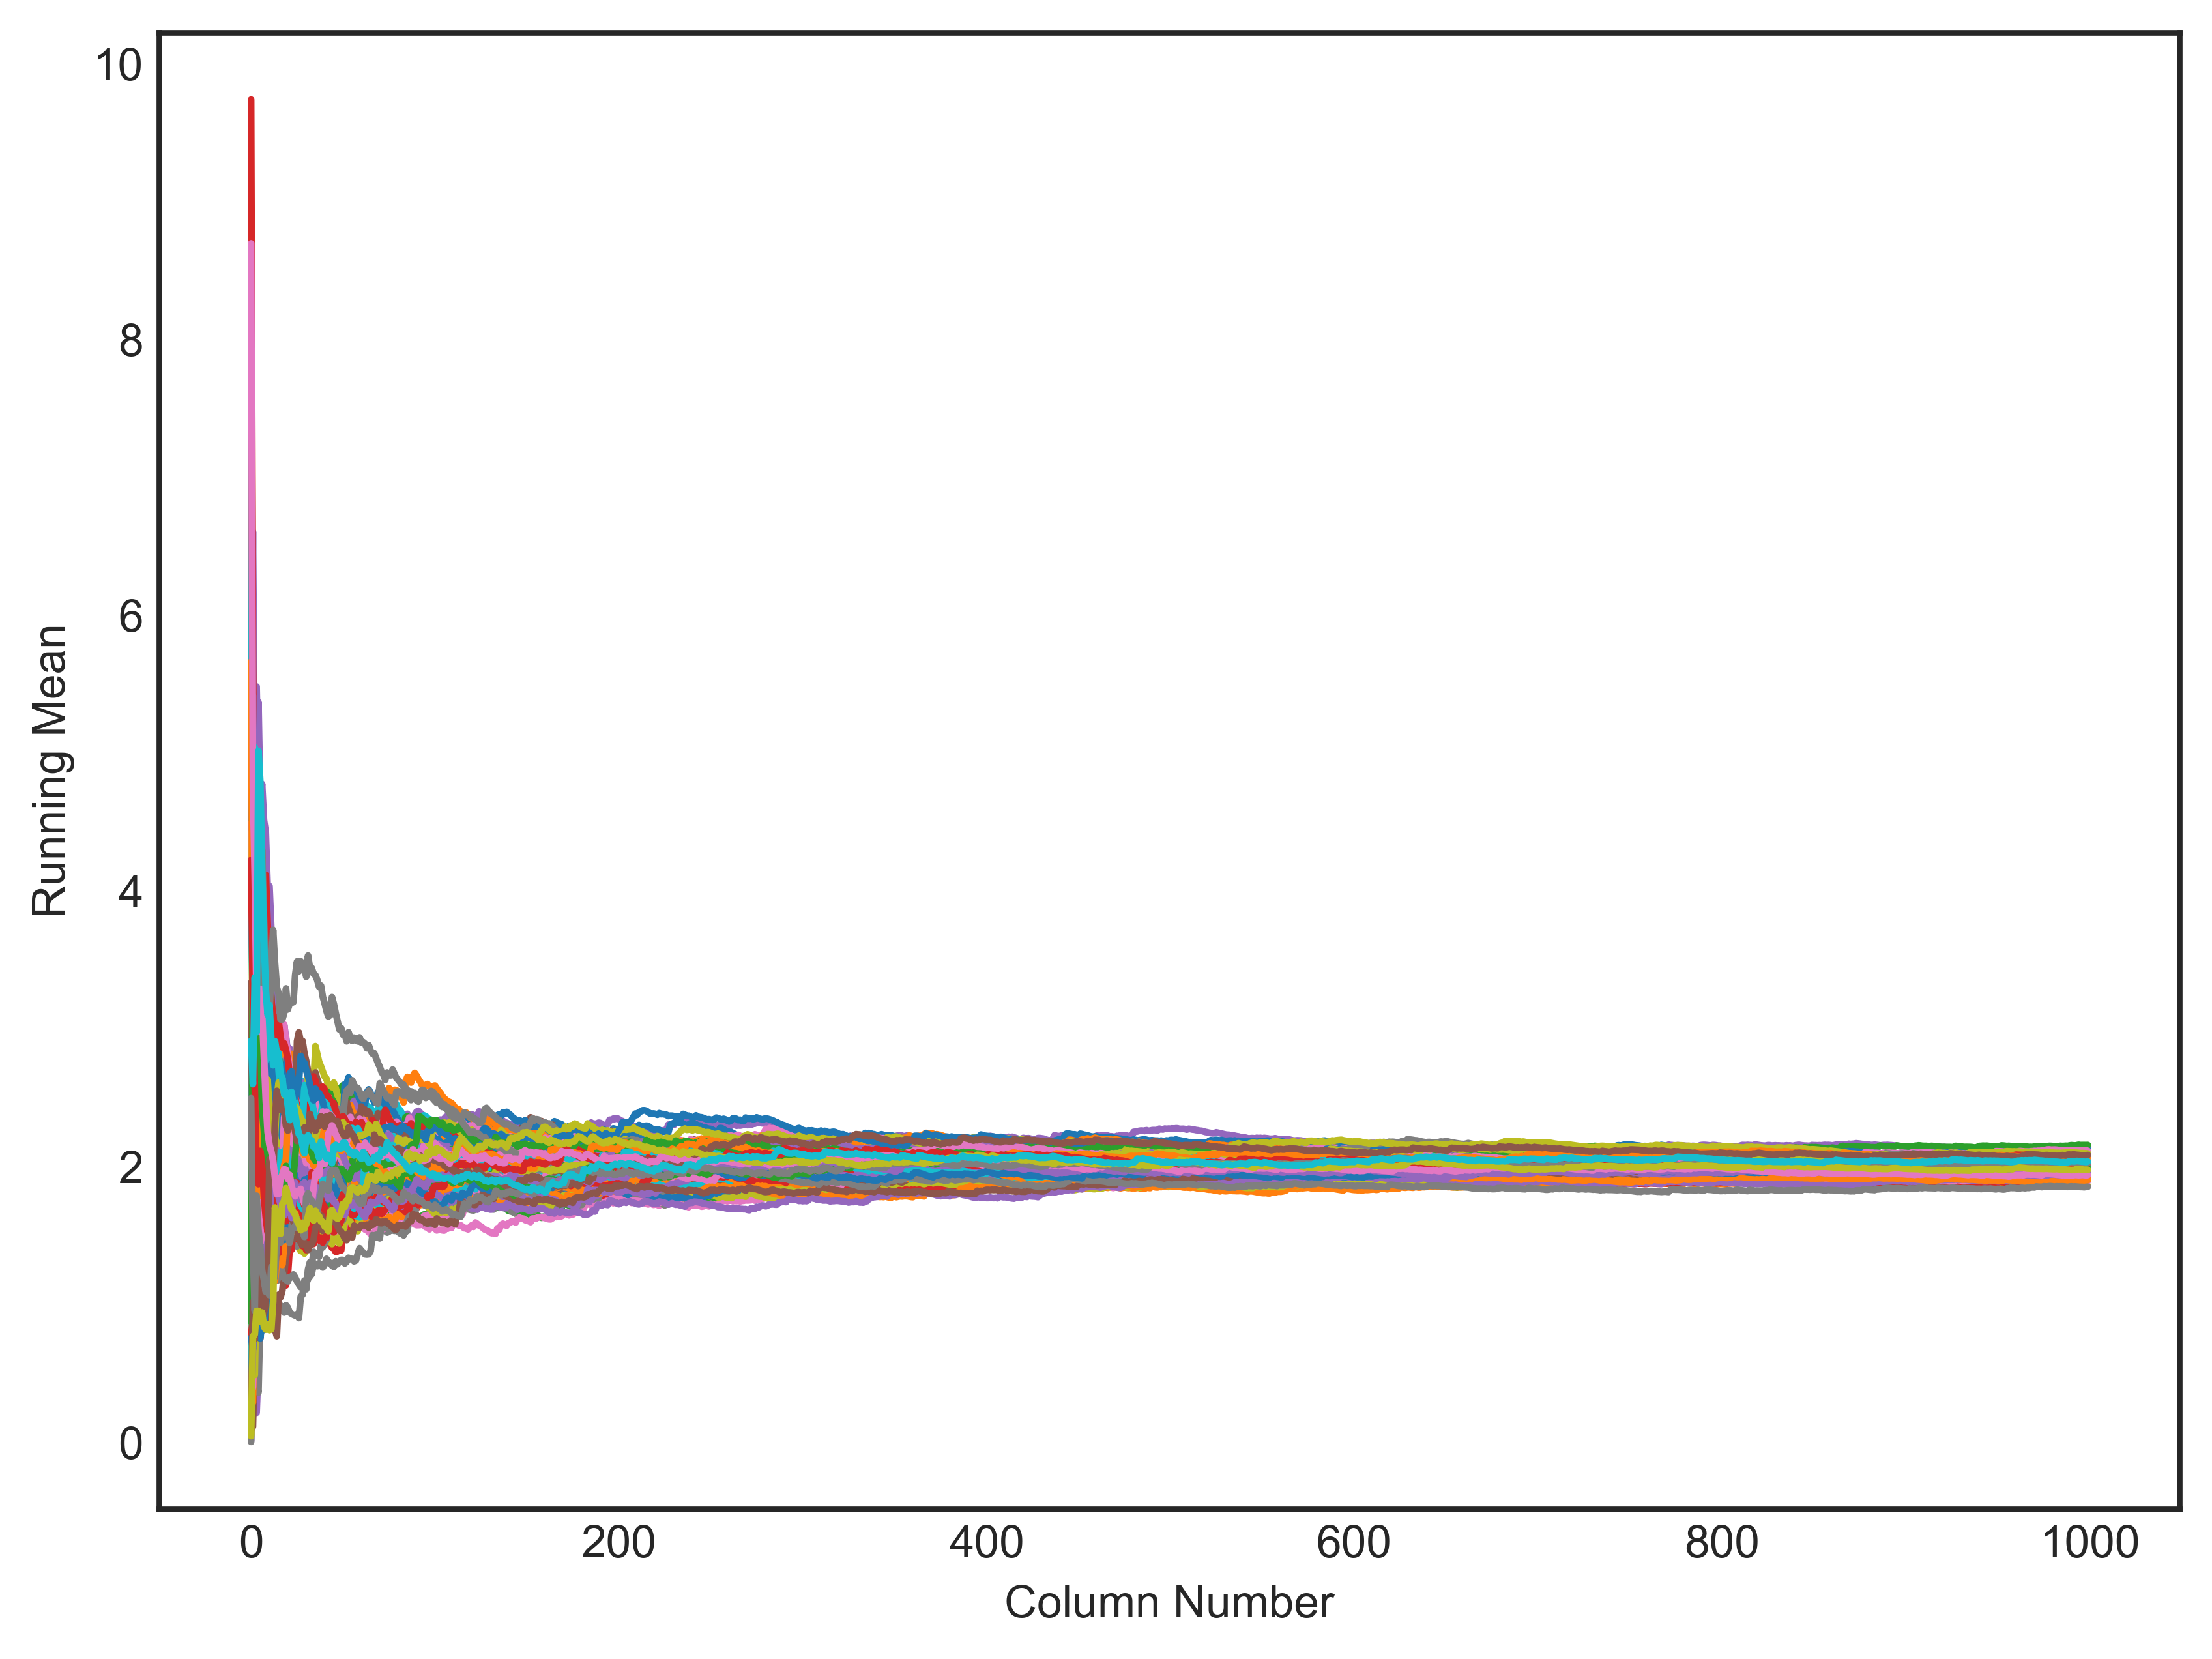

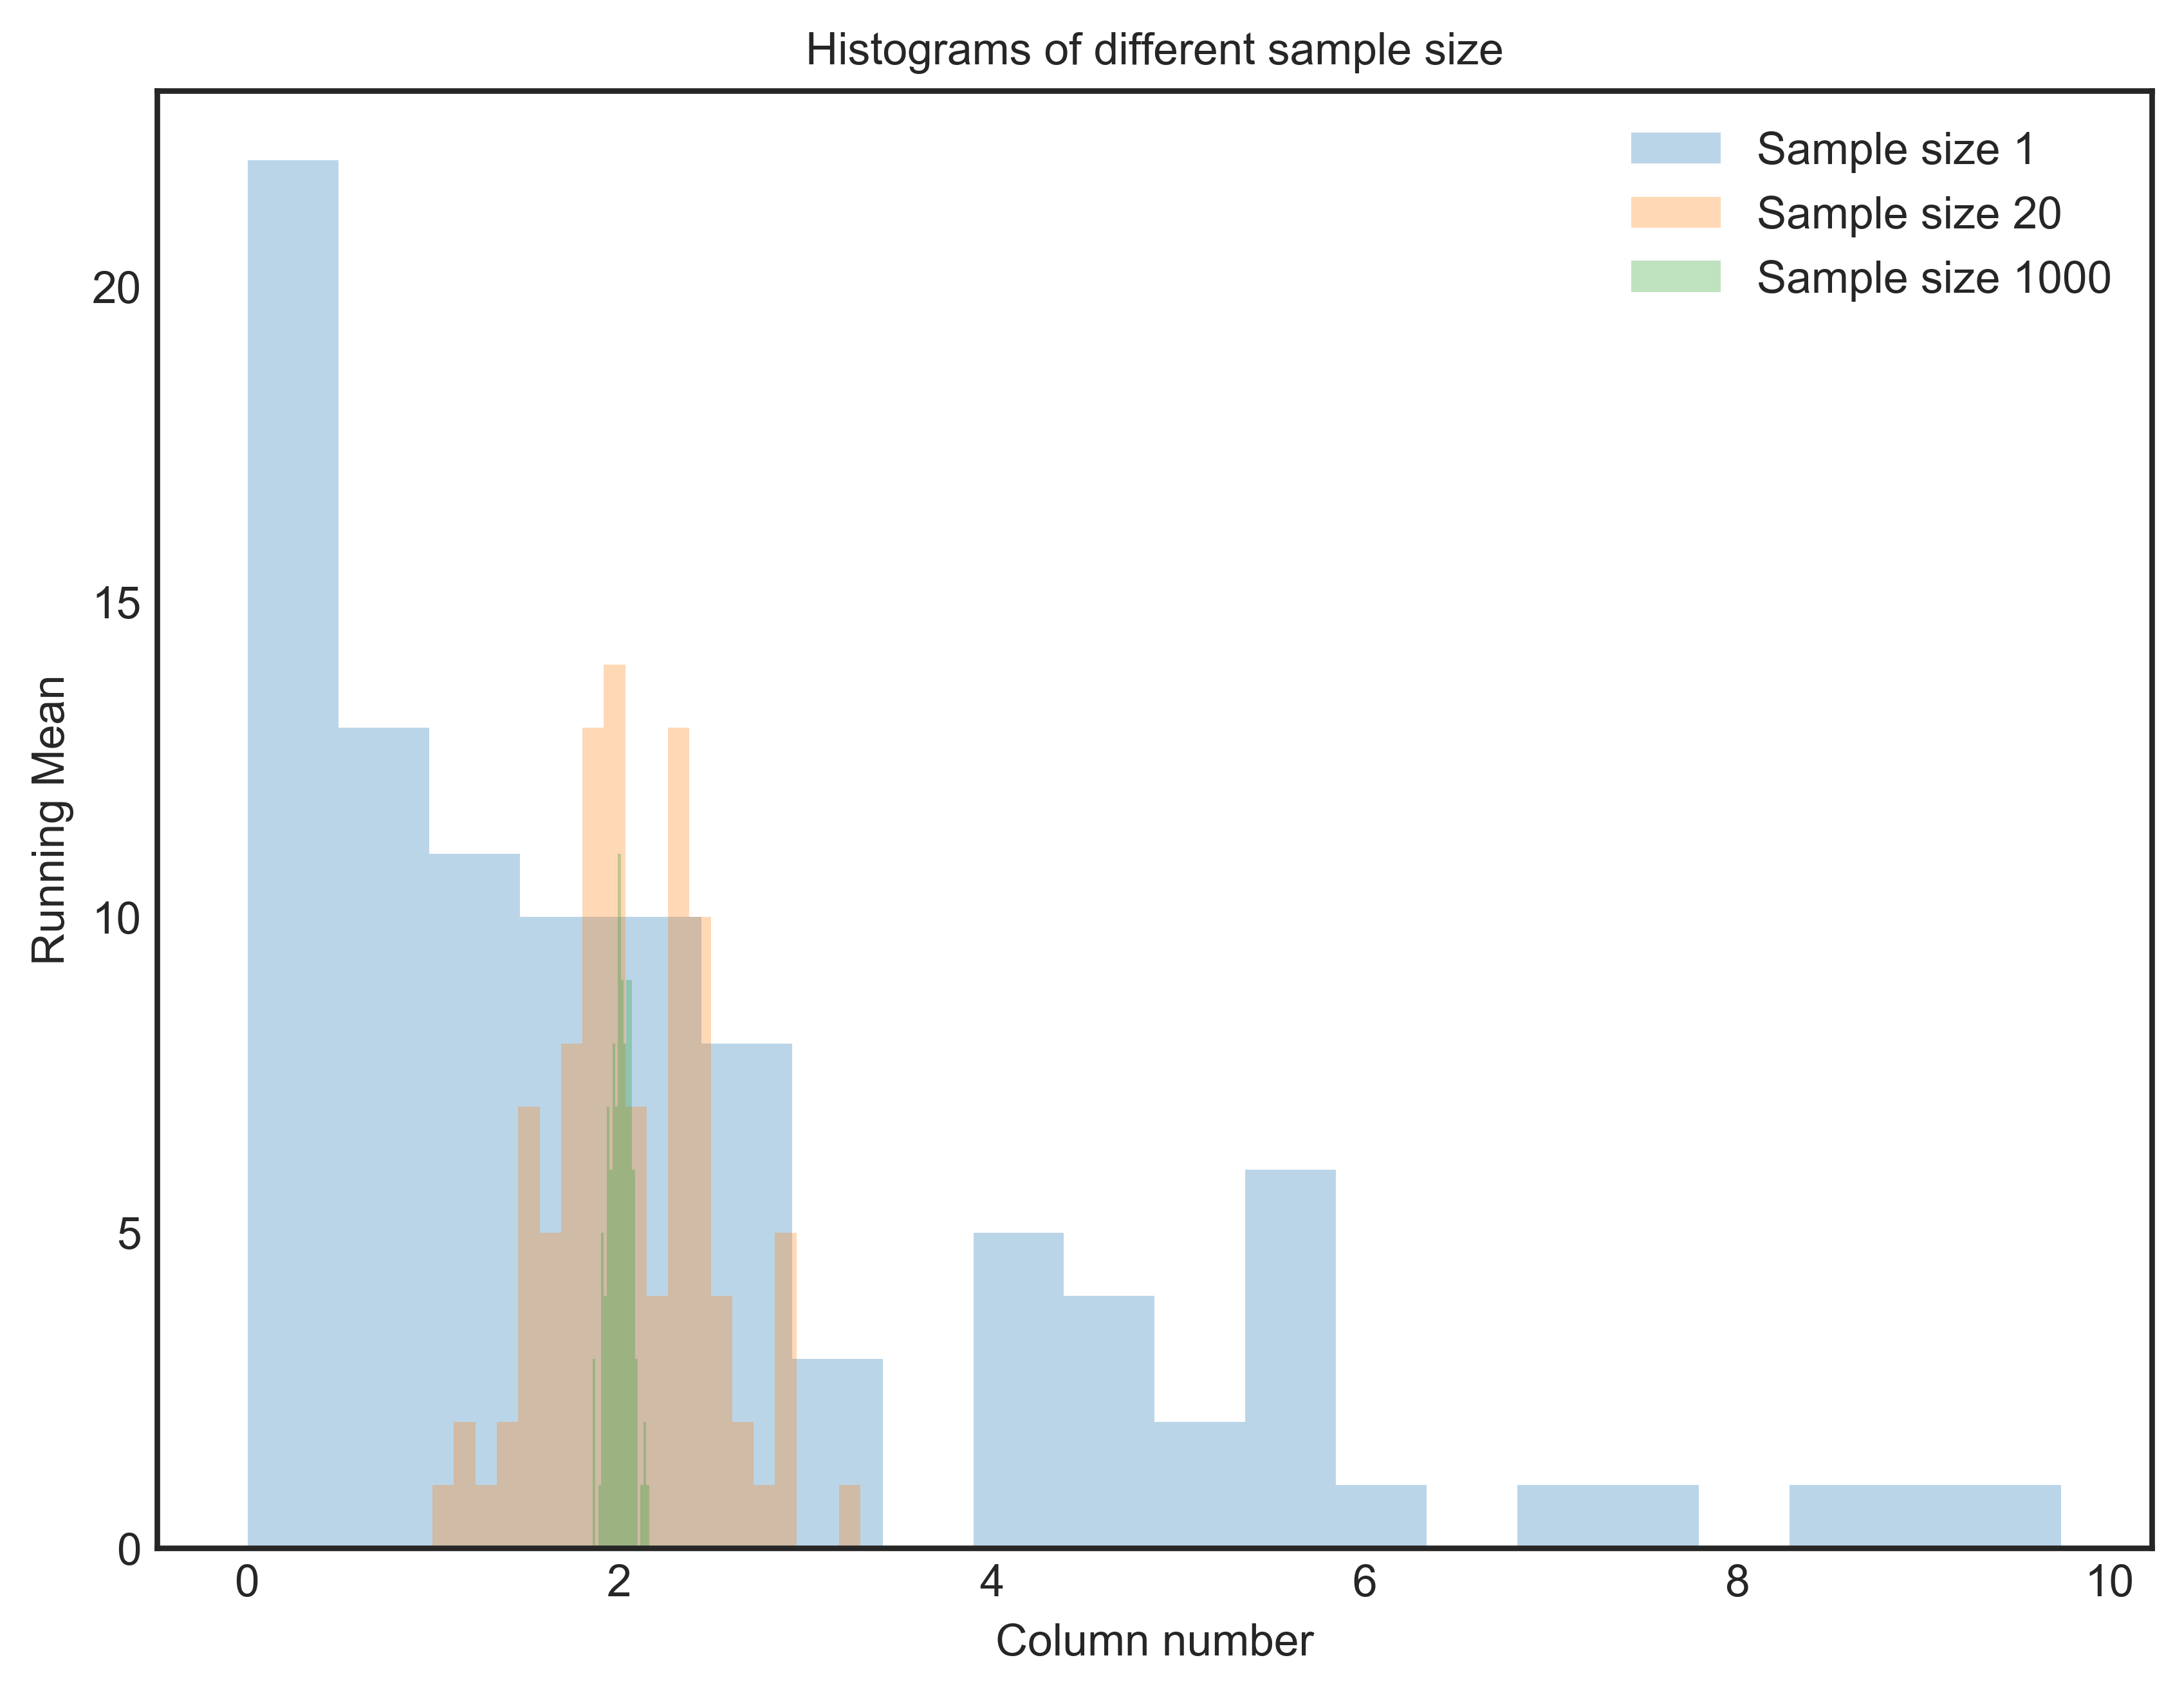

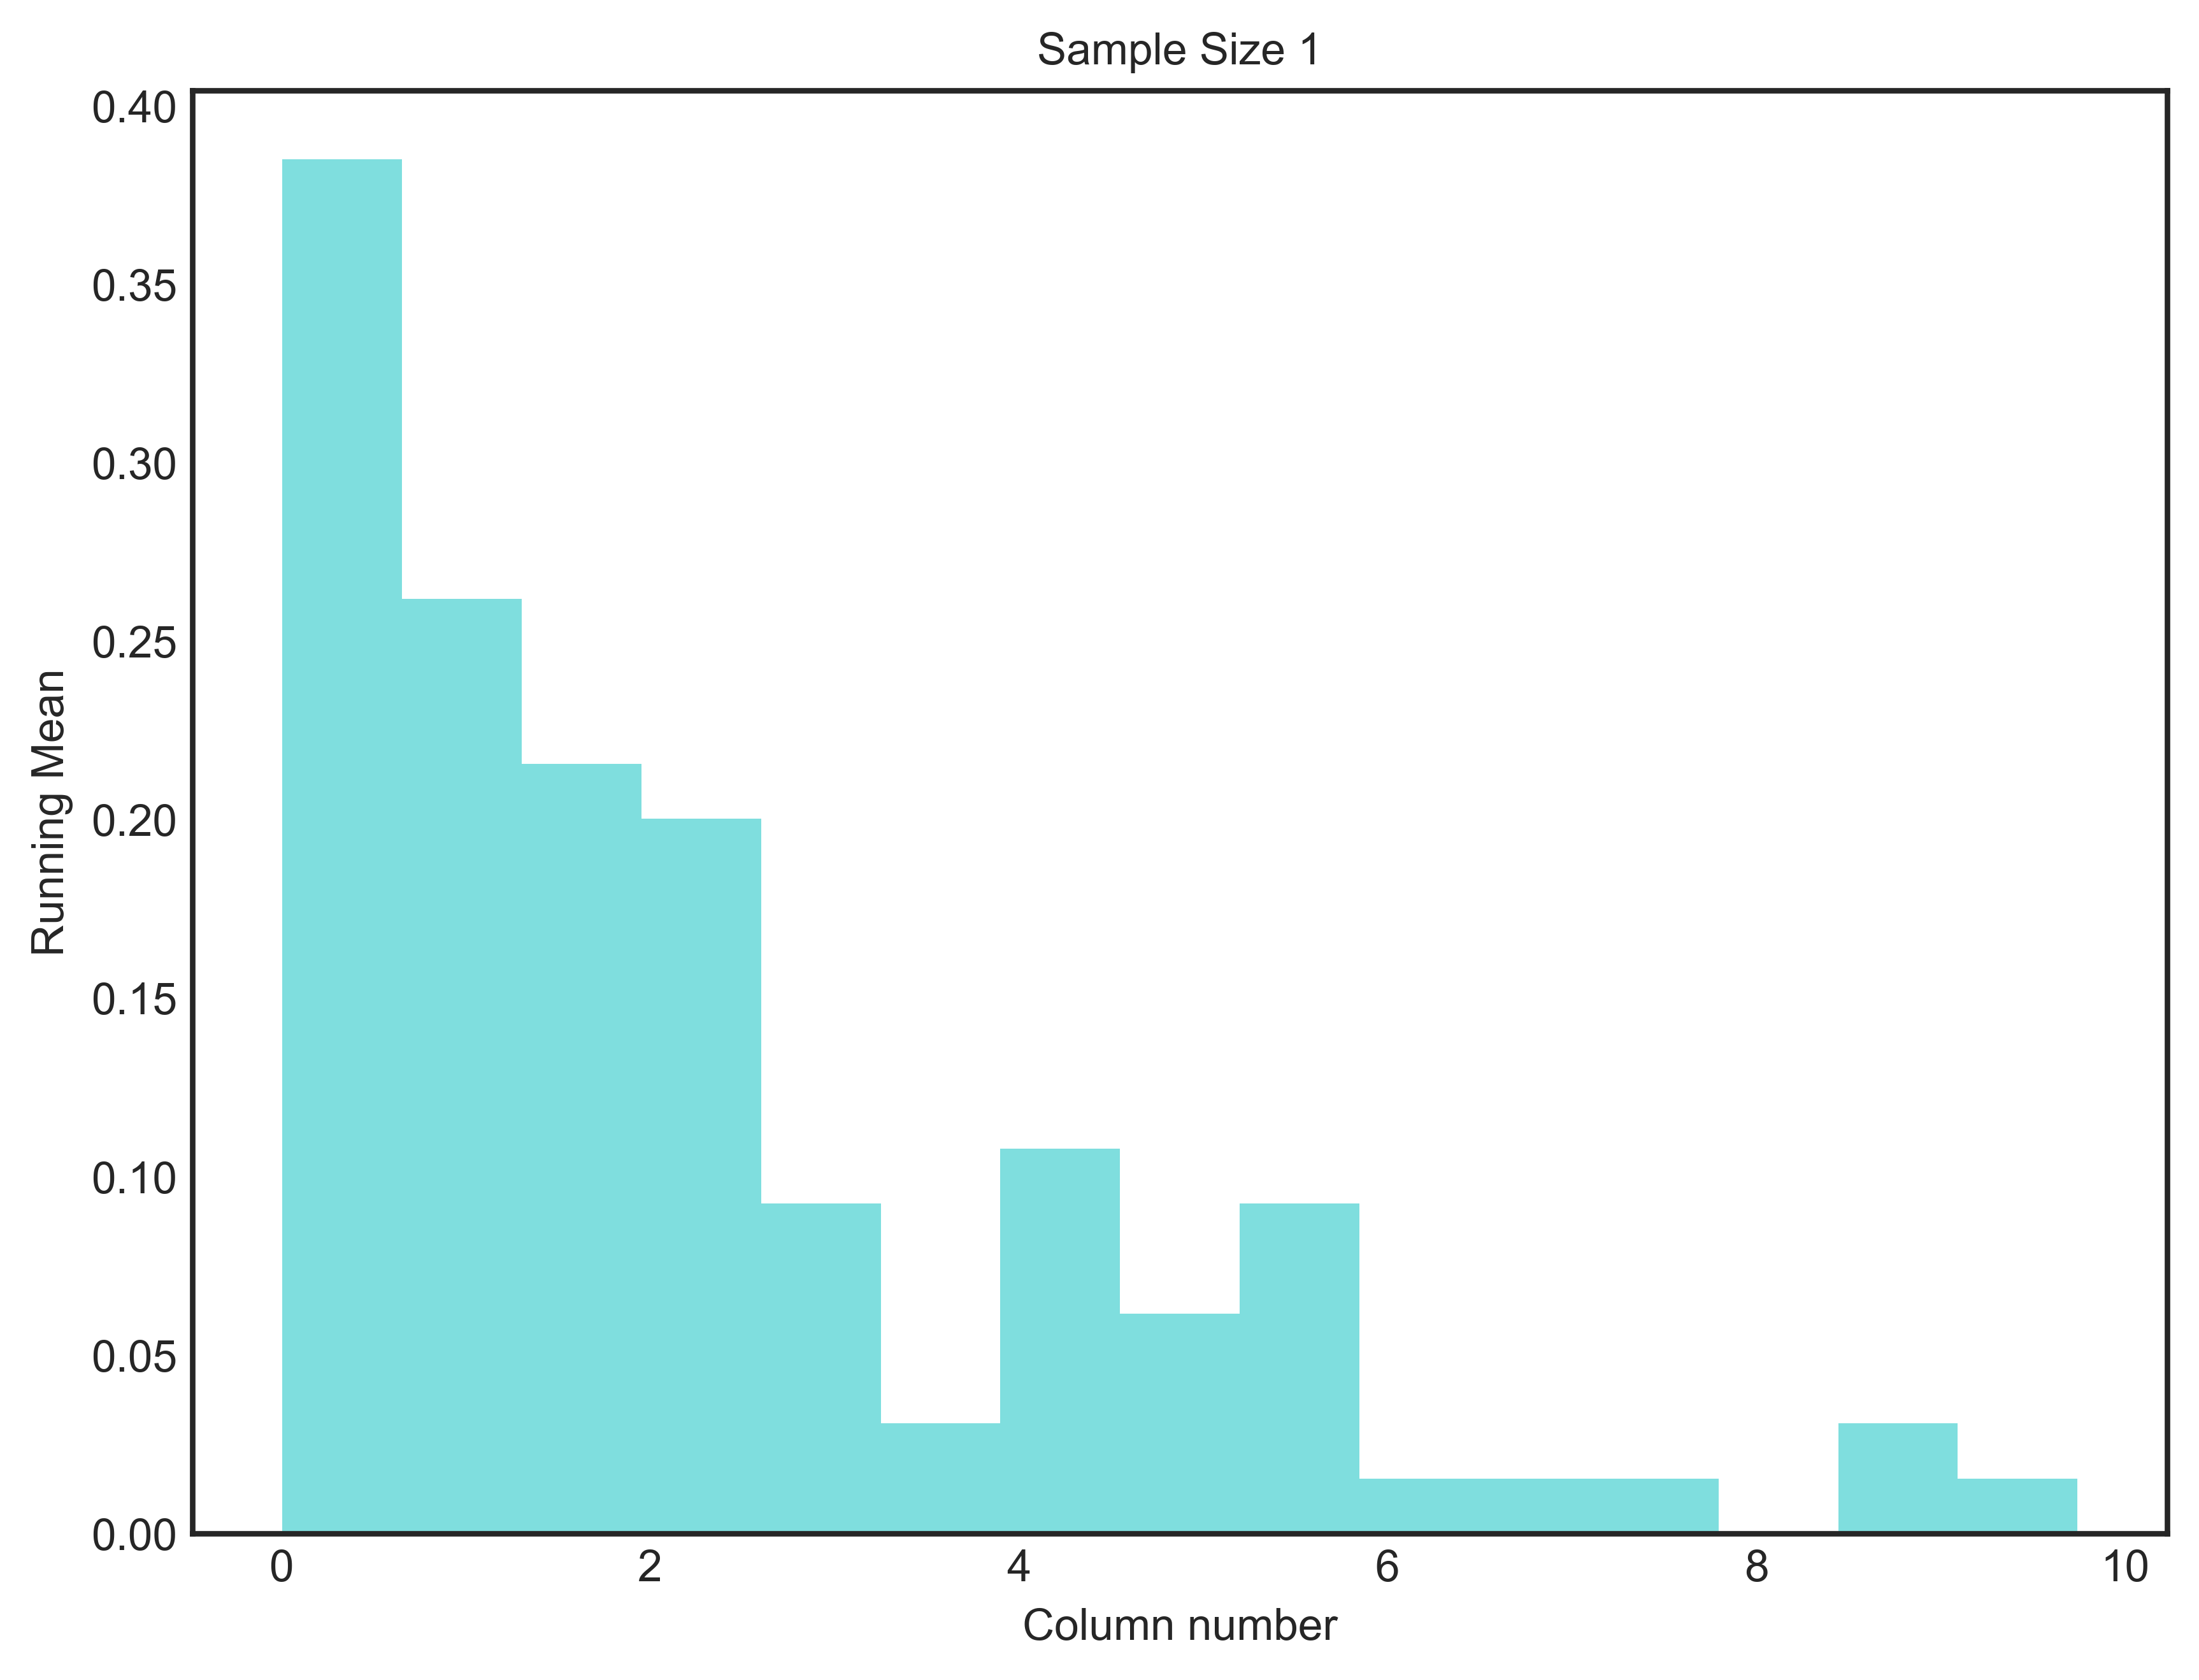

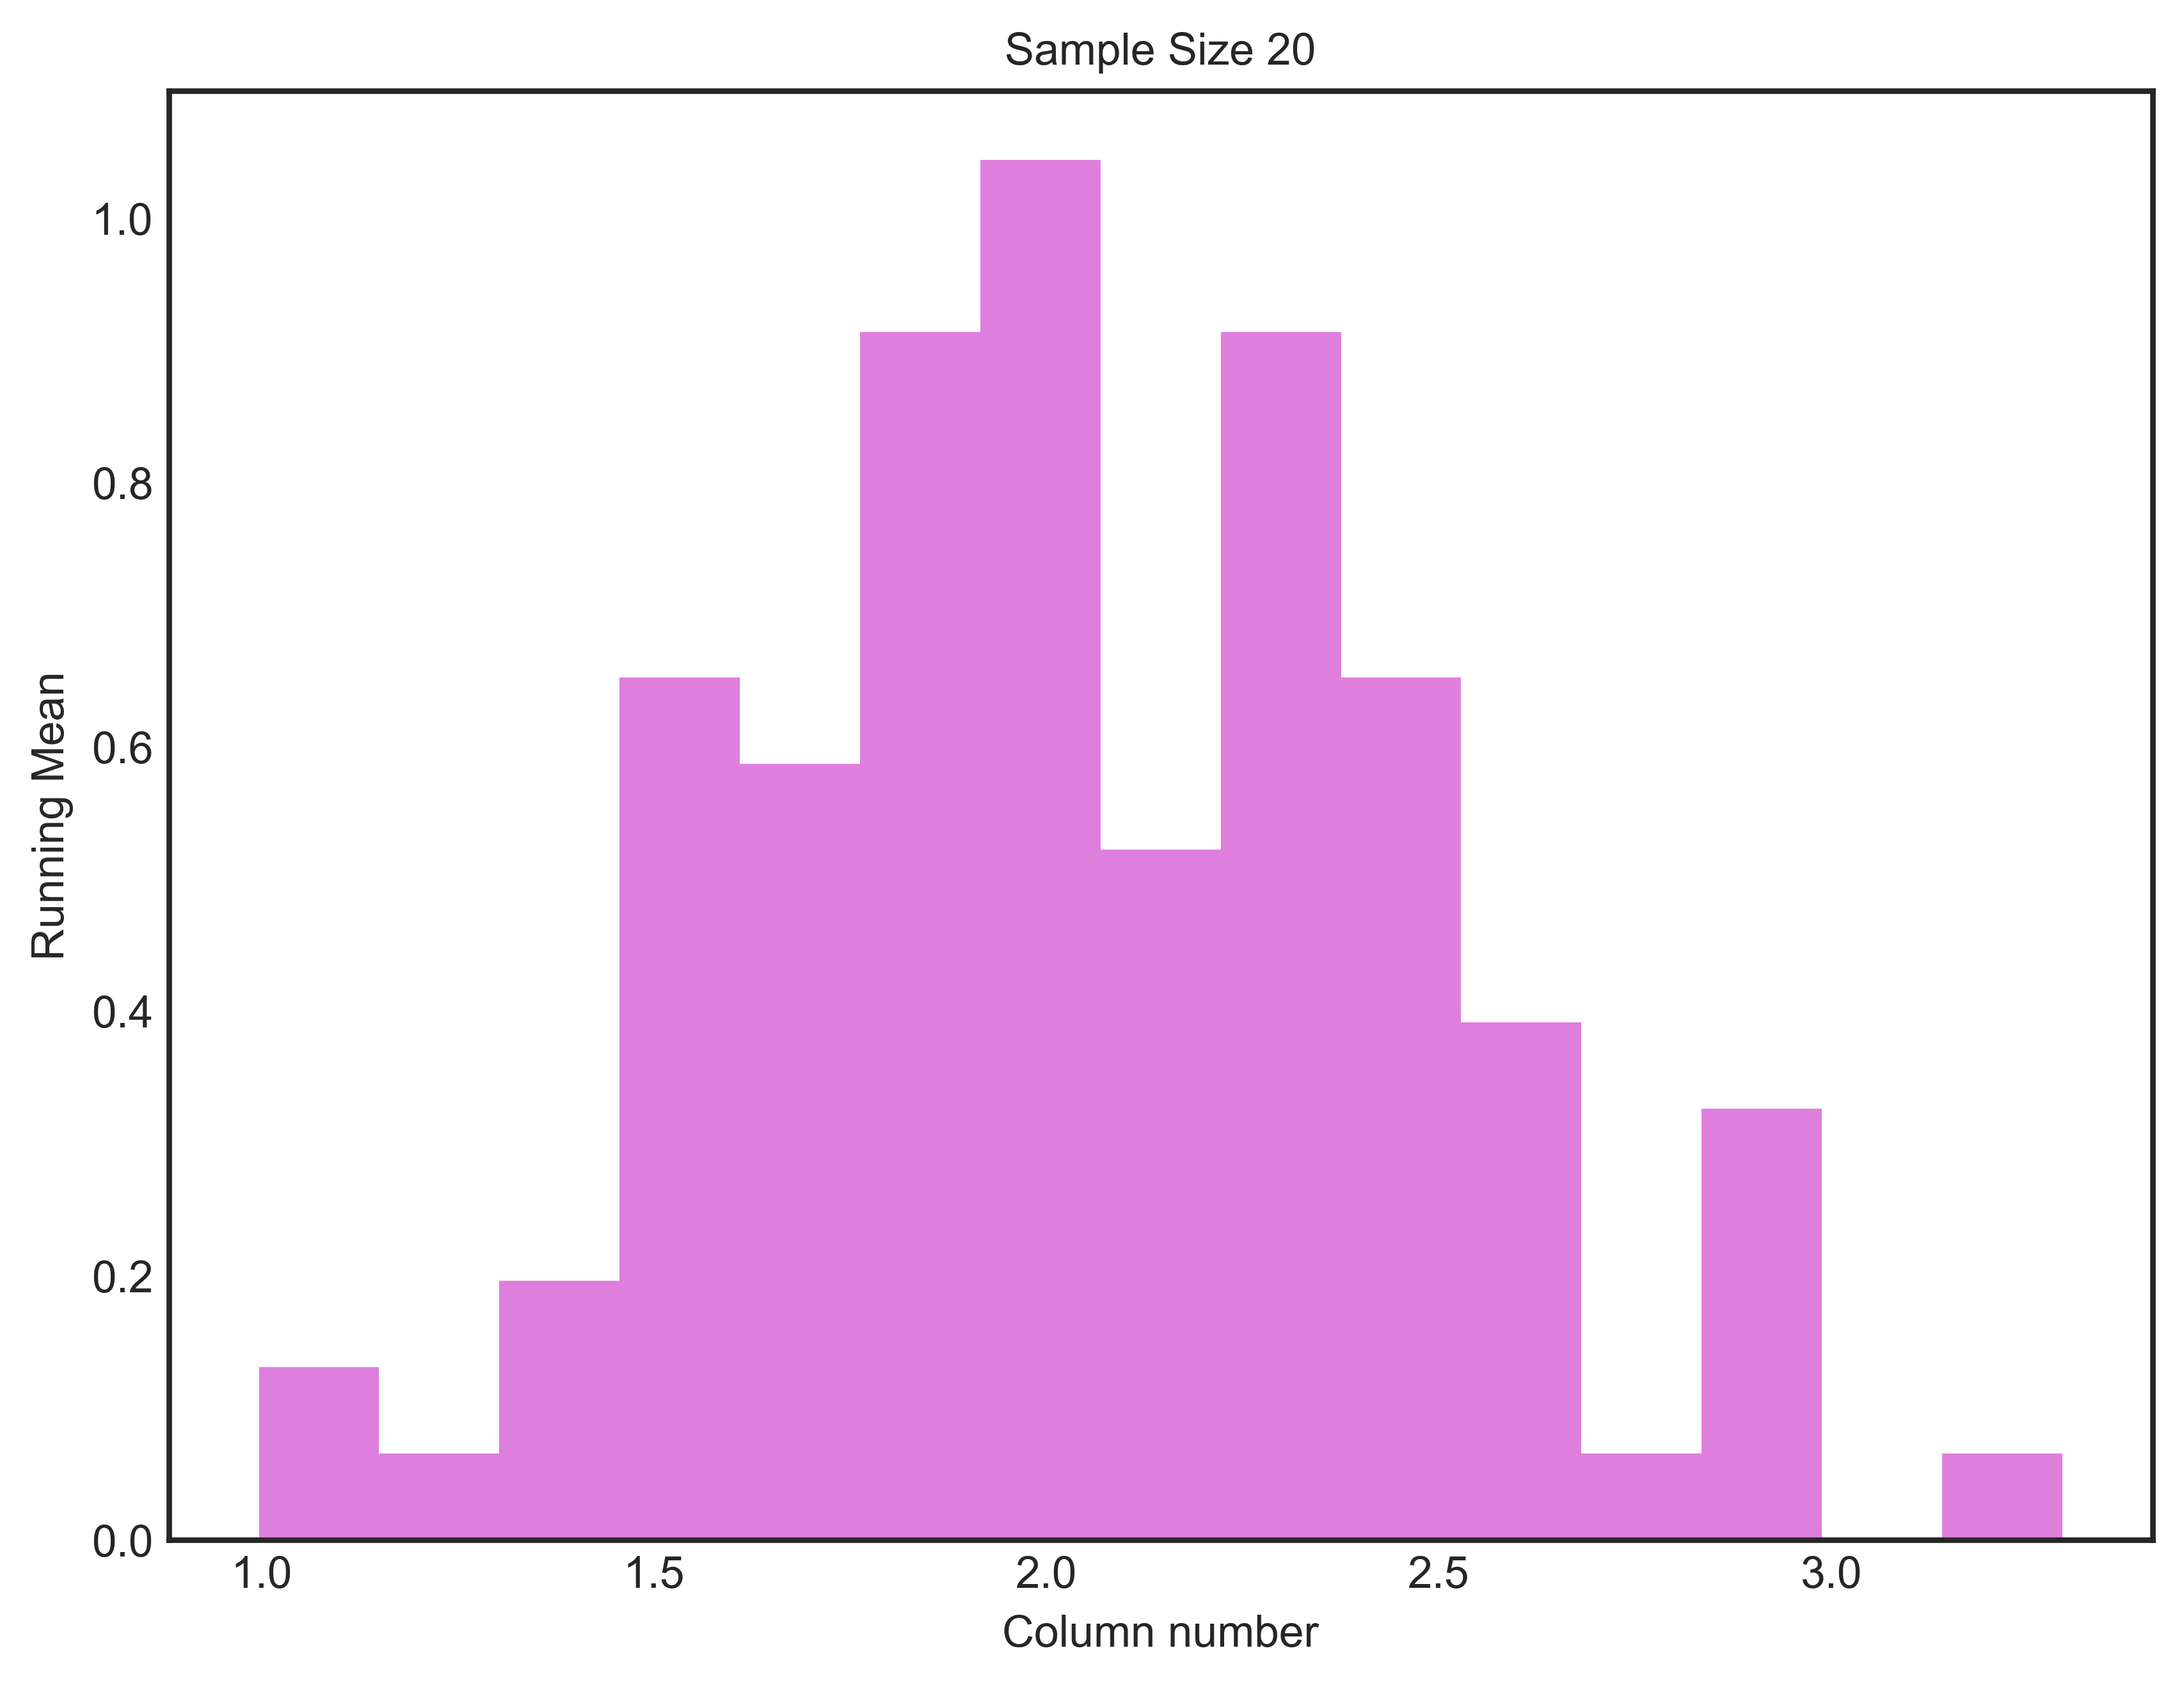

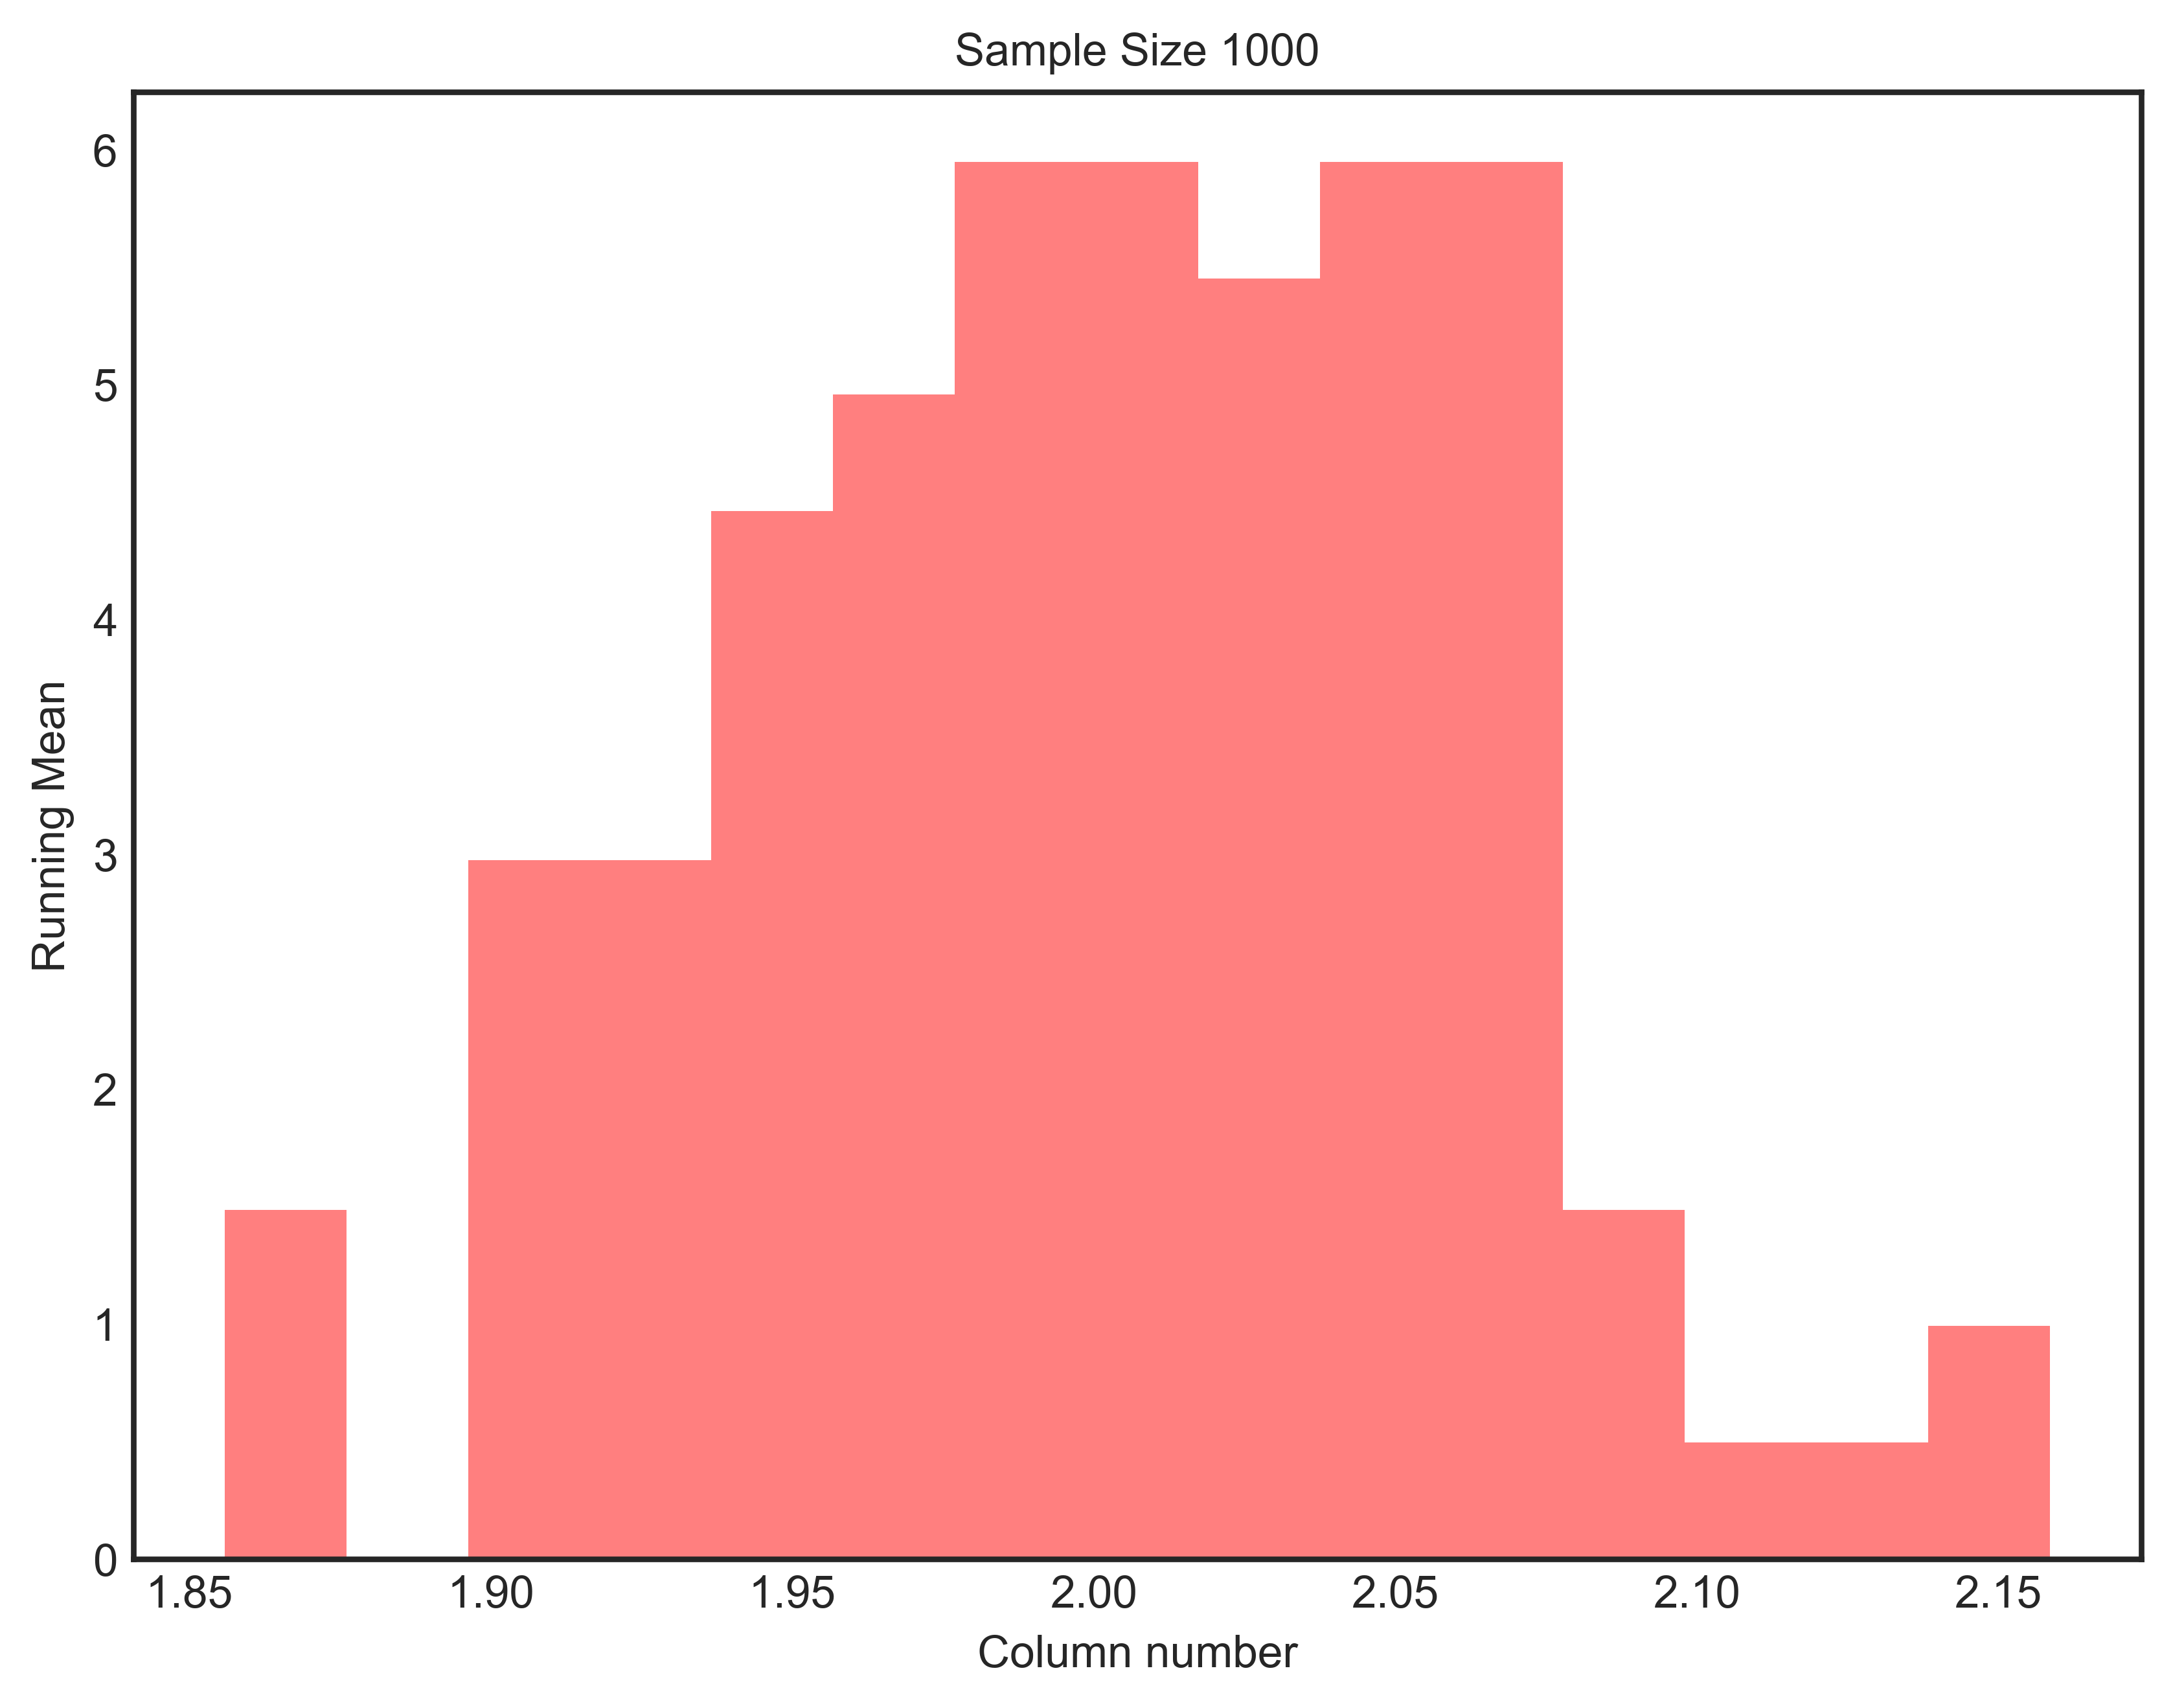

In [238]:
question_2.Plot(y)

# Answer 2.4

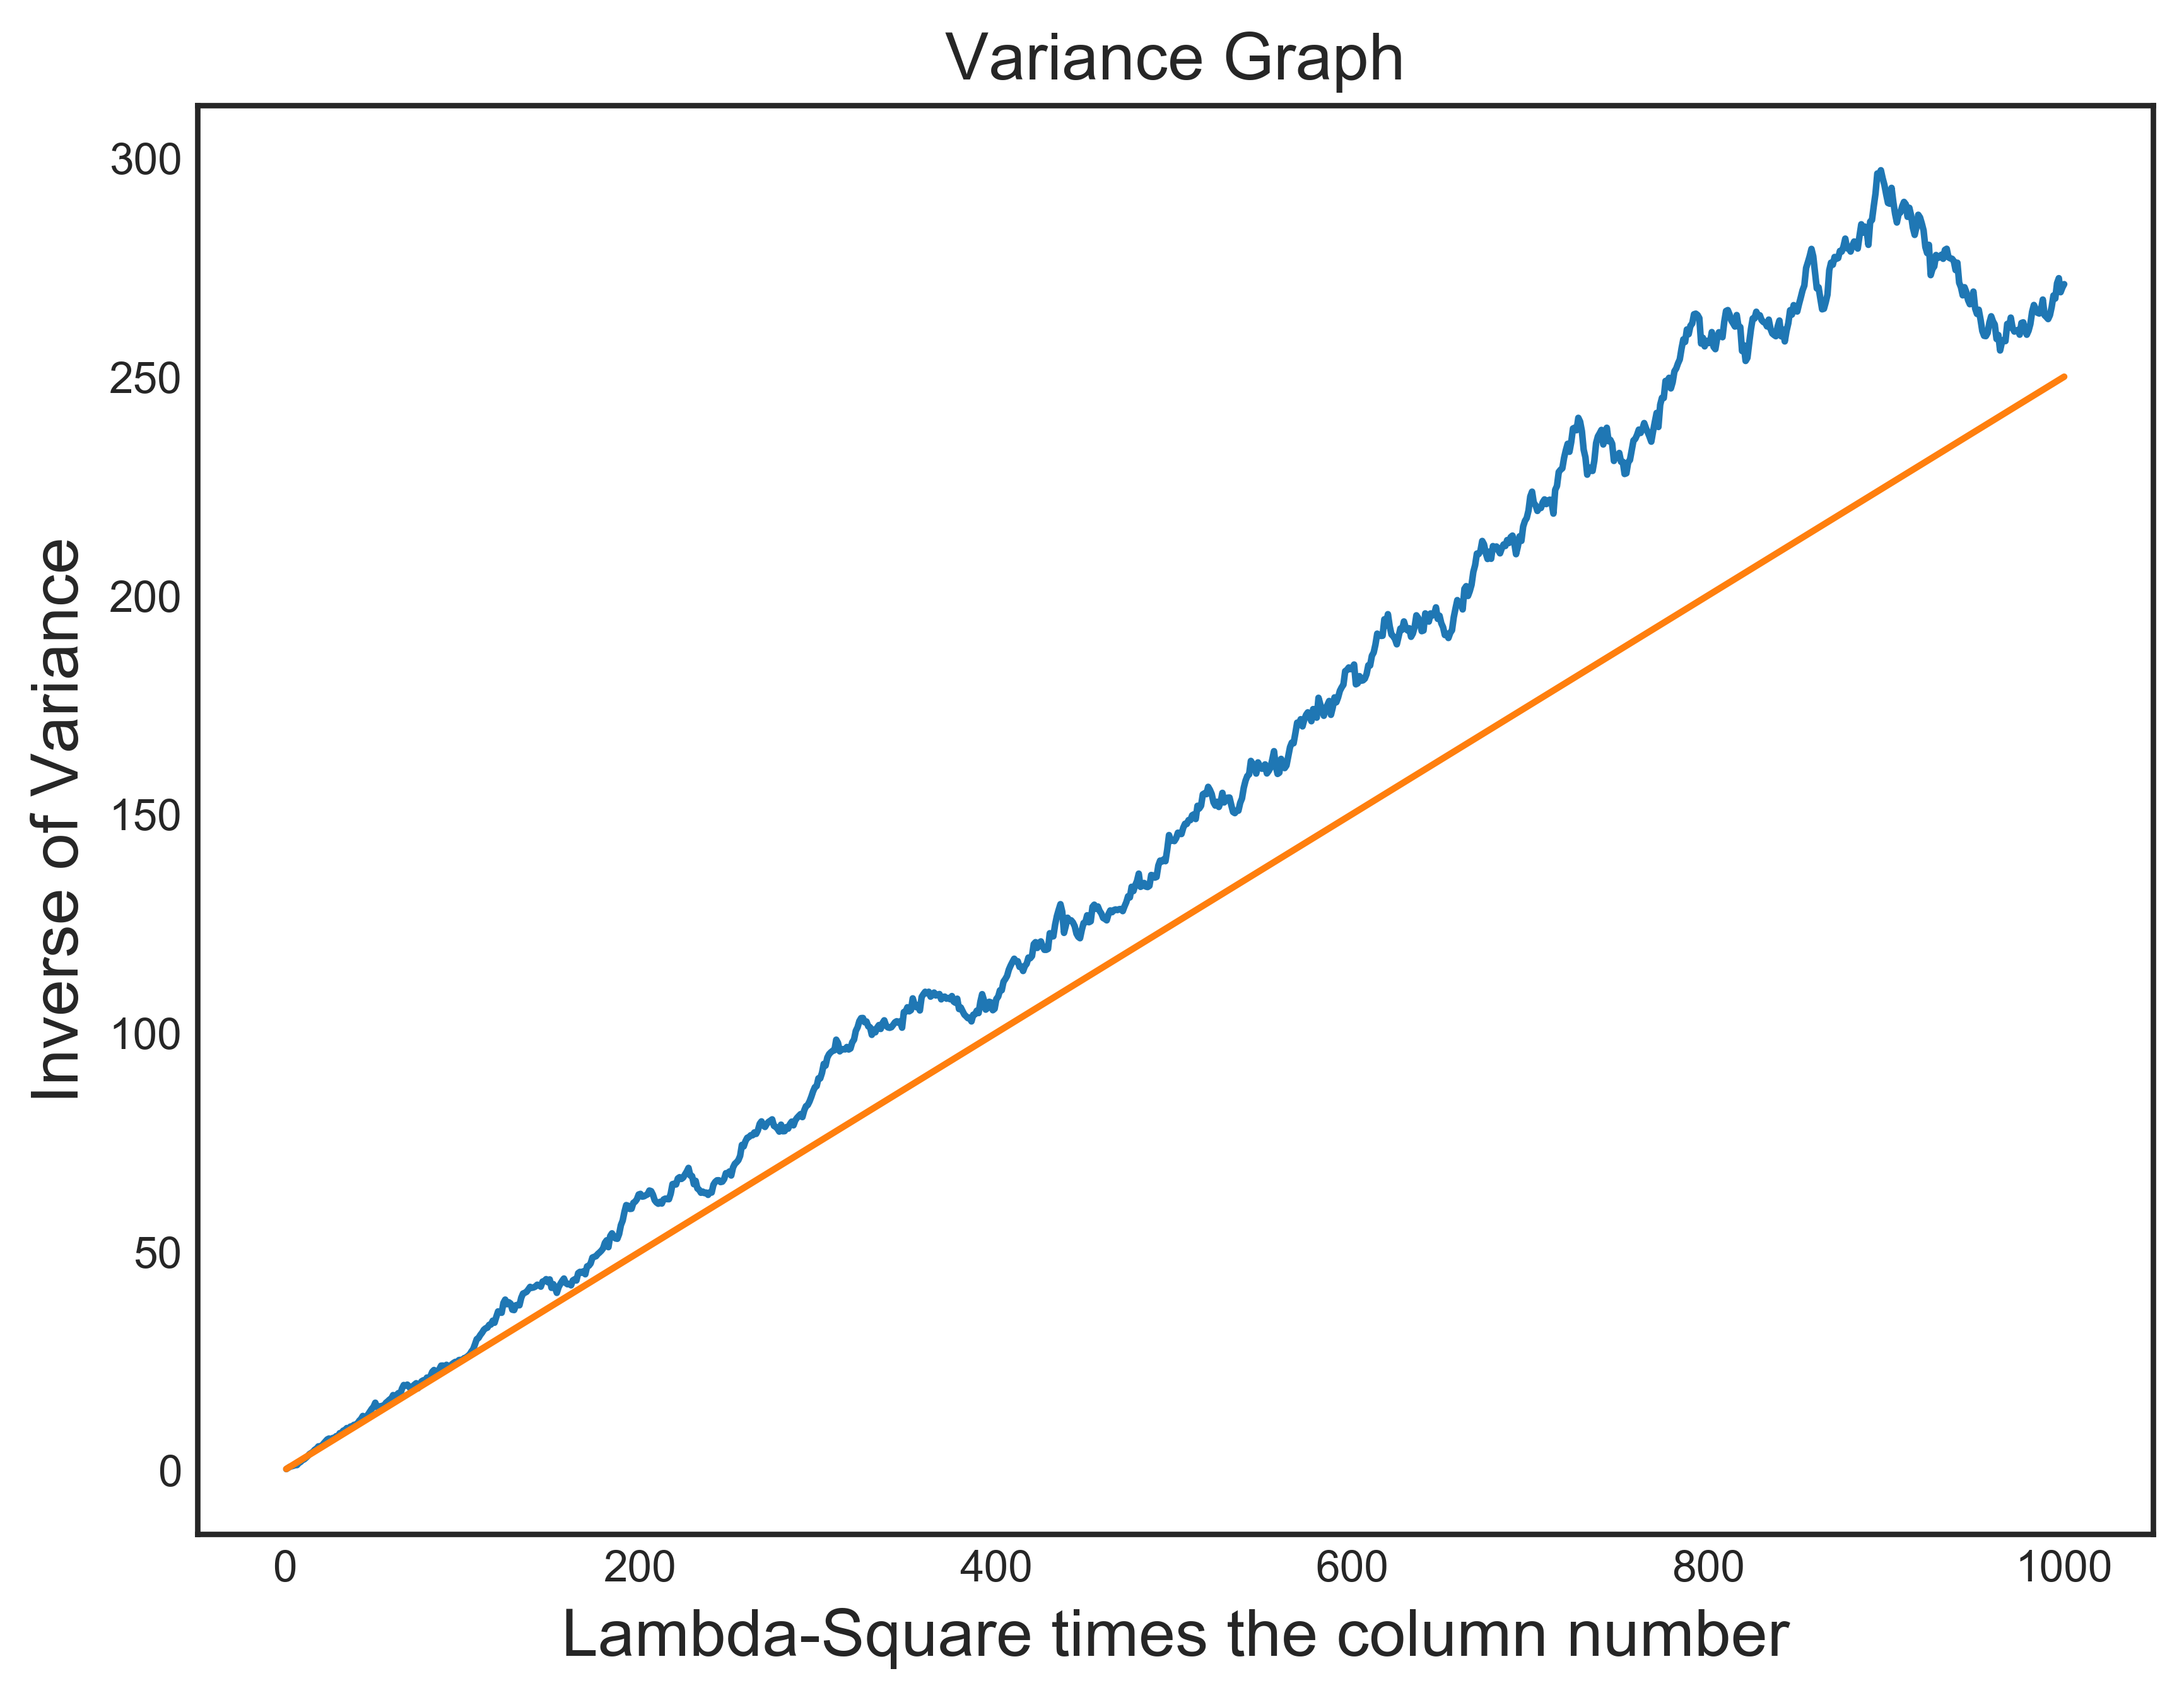

In [239]:
question_2.Plot_var(y, lambda_rate=0.5)

## Answer 2.5



Answer:- In part 3, looking the graph at different sample size, we can say that as the sample size increases and tends to infinity, the distribution of sample means approaches the Normal Distribution. This varifies the Central Limit Theorem, which states the same. It can be observed from the three histogram how the shape of the distribution changes from exponential to normal, although the true distribution is from an exponential distribution. Another inference that can be made out is the expectation of the sample mean is close to the population mean as the sample size $(n)$ is increased and tend towards infinity. As we know that, the sample mean variance ($\hat{\sigma}^2$) is given by
\begin{equation*}
\hat{\sigma}^2 = \frac{\sigma^2}{n}
\end{equation*}

therefore, $n$ increases the sample mean variance decreases.

In part 4, It can be observed that as the sample mean variance closely follows the true distribution initially, however as the sample size is increased, the sample mean variance is decreasing as compare to the true population variance. This indicates that there are less number of observations which are significantly deviated from the true population mean. 